### Describe analysis target

___
- **Imports and Data Discovery**

In [124]:
# --- Importações Essenciais ---
import pandas as pd
import numpy as np
import os
import warnings

# Visualização
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import matplotlib.pyplot as plt
from typing_extensions import Literal

# Configurações
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

print("✅ Bibliotecas importadas e configurações aplicadas.")

# --- Caminhos ---
file_name = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
kaggle_dataset = "blastchar/telco-customer-churn"

local_path = os.path.join("kaggle/input", file_name)
kaggle_input_path = os.path.join("/kaggle/input/telco-customer-churn", file_name)

# --- Função para carregar localmente ---
def carregar_csv(caminhos):
    for caminho in caminhos:
        if os.path.exists(caminho):
            try:
                df = pd.read_csv(caminho)
                print(f"✅ Arquivo carregado com sucesso: {caminho}")
                return df
            except Exception as e:
                print(f"⚠️ Erro ao tentar carregar {caminho}: {e}")
    return None

# --- Tentativa de carregar via kagglehub ---
df = None
try:
    import kagglehub
    from kagglehub import KaggleDatasetAdapter

    print("🔄 Tentando carregar via kagglehub...")
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        kaggle_dataset,
        file_name
    )

    # Salvar localmente para reutilização futura
    os.makedirs(os.path.dirname(local_path), exist_ok=True)
    df.to_csv(local_path, index=False)
    print(f"💾 Dataset salvo localmente em: {local_path}")

except Exception as e:
    print(f"⚠️ Erro ao usar kagglehub: {e}")

# --- Fallback: carregar localmente ---
if df is None:
    print("🔄 Tentando carregar localmente...")
    df = carregar_csv([
        kaggle_input_path,  # Prioriza o caminho padrão do Kaggle Notebook
        local_path          # Caminho alternativo local
    ])

# --- Verificação Final ---
if df is not None:
    print("✅ DataFrame carregado com sucesso!")
    display(df.head())
else:
    raise FileNotFoundError("❌ Não foi possível carregar o dataset nem via kagglehub nem localmente.")


✅ Bibliotecas importadas e configurações aplicadas.
🔄 Tentando carregar via kagglehub...
💾 Dataset salvo localmente em: kaggle/input\WA_Fn-UseC_-Telco-Customer-Churn.csv
✅ DataFrame carregado com sucesso!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
# Lets create a description dataframe to consult the columns values and details
data_desc = {
    "Column name": df.columns,
    "Description": ["Customer ID","Whether the customer is a male or a female","Whether the customer is a senior citizen or not","Whether the customer has a partner or not","Whether the customer has dependents or not","Number of months the customer has stayed with the company","Whether the customer has a phone service or not","Whether the customer has multiple lines or not","Customer’s internet service provider","Whether the customer has online security or not","Whether the customer has online backup or not","Whether the customer has device protection or not","Whether the customer has tech support or not","Whether the customer has streaming TV or not","Whether the customer has streaming movies or not","The contract term of the customer","Whether the customer has paperless billing or not","The customer’s payment method","The amount charged to the customer monthly","The total amount charged to the customer","Whether the customer churned or not",
    ],
    "Values preview": ["Progressive values","Male, Female","1 (Yes), 0 (No)","Yes, No","Yes, No","Número inteiro (ex: 1, 12, 24)","Yes, No","Yes, No, No phone service","DSL, Fiber optic, No","Yes, No, No internet service","Yes, No, No internet service","Yes, No, No internet service","Yes, No, No internet service","Yes, No, No internet service","Yes, No, No internet service","Month-to-month, One year, Two year","Yes, No","Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)","Valor monetário (ex: 20.50, 75.00)","Valor monetário (ex: 1000.00, 2500.50)","Yes, No",
    ],
}

df_desc = pd.DataFrame(data_desc)

df_desc

,Column name,Description,Values preview
0,customerID,Customer ID,Progressive values
1,gender,Whether the customer is a male or a female,"Male, Female"
2,SeniorCitizen,Whether the customer is a senior citizen or not,"1 (Yes), 0 (No)"
3,Partner,Whether the customer has a partner or not,"Yes, No"
4,Dependents,Whether the customer has dependents or not,"Yes, No"
5,tenure,Number of months the customer has stayed with ...,"Número inteiro (ex: 1, 12, 24)"
6,PhoneService,Whether the customer has a phone service or not,"Yes, No"
7,MultipleLines,Whether the customer has multiple lines or not,"Yes, No, No phone service"
8,InternetService,Customer’s internet service provider,"DSL, Fiber optic, No"
9,OnlineSecurity,Whether the customer has online security or not,"Yes, No, No internet service"


In [78]:
# Shapping data
df.shape

(7043, 21)

In [79]:
# Transforming a DataFrame to a DataFrameFake for Experiments,
# to not modify the original datagrame, if we want to compare

# dff = Data Frame Fake
dff = df

___
- **Data Discovery: Data Vizualization** 

Here, I attempt to retrieve the integer columns, to next, use the `describe()` function, but I noticed that the column "`[TotalCharges]`" was not included in the output. Let's investigate why this happened.




In [80]:
# Obter os nomes das colunas com tipos int e float
def getColumnByTypes(dataframe,type:Literal["objects","numeral"]):
    
    if type =="objects":
        return dataframe.select_dtypes(include=["object"]).columns        
    if type =="numeral":
        return  dataframe.select_dtypes(include=[int, float]).columns

    
int_columns = getColumnByTypes(dff,"numeral")

obj_columns = getColumnByTypes(dff,"objects")


print(f"Int & Float: {int_columns}")
print("\n")
# Obter os nomes das colunas com tipo string (object)
print(f"Str: {obj_columns}")

Int & Float: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


Str: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [81]:
dff["TotalCharges"] = pd.to_numeric(dff["TotalCharges"], errors="coerce")

dff.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

___

-  **Analytical thinking:**

We see that there are 11 rows with null values in the ``[TotalCharge]`` column. We noticed a pattern in the ``[tenure]`` column — all of them are equal to "0". This indicates it's the first month of the contract, so no one in this group has paid yet.

In [82]:
# Check the null rolls sum

tc = dff["TotalCharges"]
print(f"null Rows: {tc.isnull().sum()}")

# Checking null values
print(f"Exist null values: {tc.isnull().any()}")

df_nulls = dff[tc.isnull()]

print(f"Check all Churn column values: {df_nulls['Churn'].unique()}")

null Rows: 11
Exist null values: True
Check all Churn column values: ['No']


___
-  **Data Cleaning**

Here lets cleaning the data to a deep analysis

In [83]:
# Lets fill TotalCharge with 0 value
dff["TotalCharges"] = dff["TotalCharges"].fillna(0)
dff.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [84]:
# Now lets change the string-booleans values to int-booleans to get it up the correlations betweens the columns.
boolean_cols = dff.columns
for col in boolean_cols:
    if set(dff[col]) <= {"Yes", "No"}:
        dff[col] = dff[col].map({"No": 0, "Yes": 1})

dff_info = dff.info()
int_columns = getColumnByTypes(dff,"numeral")
obj_columns = getColumnByTypes(dff,"objects")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


___
- **EDA – Exploratory Data Analysis**

In this topic we'll analyse the dataframe when/how/why our clients is churning and propose action plan to this

In [85]:
# First of all lets check the current churnes values.

churns = dff["Churn"].value_counts().reset_index()
churns_fig = px.pie(
    churns, names="Churn", values="count", title="Churns", hole=0.4
).update_traces(textinfo="label+percent+value", pull=[0.04])
mapping = {0: "false", 1: "true"}

churns["Churn_label"] = churns["Churn"].map(mapping)

churns_fig = px.pie(
    churns, names="Churn_label", values="count", title="Churns", hole=0.4
)
churns_fig.update_traces(textinfo="percent+value+value", pull=[0.04])
churns_fig.show()

<Axes: >

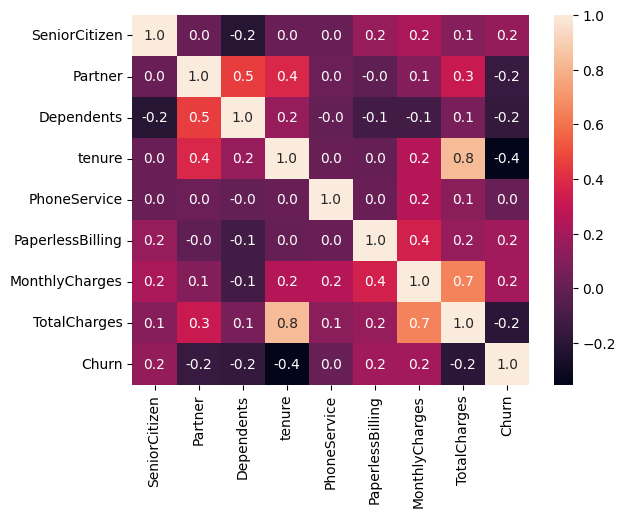

In [86]:
# Float/Int Columns correlations
# Setup data to get correlations from the int/float columns


def churnHeatMap(dataframe):

    int_columns = getColumnByTypes(dataframe,"numeral")
    corrs = dataframe[int_columns].corr()
    heatmap_fig = sns.heatmap(corrs, annot=True, fmt=".1f")
    return heatmap_fig


churnHeatMap(dff)

# We can observe the correlation between churn and TotalCharges, Dependents, Partner, and Tenure, with Tenure being the most noticeable factor

In [87]:
# String Columns correlations**
# Setup to get get the correlation from the obj/str columns


def churnPecentageColValues(dataframe, min_churn_pct, chart):

    all_df = pd.DataFrame()

    obj_columns = getColumnByTypes(dff,"objects").tolist()


    # Remove the unique values column
    obj_columns.remove("customerID")

    # get the concat daframe
    for col in obj_columns:
        pivot = dataframe.pivot_table(values="Churn", index=col, aggfunc="mean")
        pivot.index = pivot.index.map(lambda x: f"{col} - {x} ")
        all_df = pd.concat([all_df, pivot])

    all_df.sort_values(by="Churn", ascending=True)
    all_df = all_df.sort_values(by="Churn", ascending=False)

    all_df_col = all_df.reset_index(names="col_name_value").sort_values(
        by="Churn", ascending=True
    )

    all_df_col["Churn"] = all_df_col["Churn"].round(decimals=2)
    all_df_col = all_df_col[all_df_col["Churn"] >= min_churn_pct / 100]
    all_df_col[["col_name", "value"]] = all_df_col["col_name_value"].str.split(
        " - ", expand=True
    )

    bar_churn_fig = px.bar(all_df_col, x="Churn", y="col_name_value", text_auto=True)
    display_df = all_df_col.sort_values("Churn", ascending=False)

    if chart == True:
        return bar_churn_fig.show()
    return display_df


def churnPecentageCol(dataframe, min_churn_pct, chart):

    val = churnPecentageColValues(dataframe, min_churn_pct, False)

    col_df = val.groupby("col_name")["Churn"].mean().reset_index()
    col_df["Churn"] = col_df["Churn"].round(decimals=2)
    col_df = col_df.sort_values(by="Churn", ascending=True)
    col_df_fig = px.bar(col_df, x="Churn", y="col_name", text_auto=True)
    if chart == True:
        return col_df_fig.show()
    return col_df


churnPecentageCol(dff, 30, True)
churnPecentageColValues(dff, 30, True)

# We analyze categorical columns to identify which customer characteristics are most associated with churn, displaying the values ​​with the highest churn rates above a defined threshold.

In [88]:
# Now, let's analyze the churned users in relation to another variable: tenure. As mentioned in the file, tenure represents the number of months a user stayed with the company before canceling their plan.

grouped = dff.groupby(["tenure", "Churn"]).size().reset_index(name="count")

fig = px.bar(
    grouped,
    x="tenure",
    y="count",
    color="Churn",
    barmode="stack",
    title="Churn by Histogram",
)

fig.show()

# in this analysis we can observe there's a  issue on the first mo of contract. Let's keeping seeking the root cause.

In [89]:
# Filter that just to get the churned clients
just_churn = dff[dff["Churn"] == 1]


def tenureToYears(tenure_value):
    years = tenure_value // 12
    return years


def createYearColumn(dataframe):
    dataframe["years"] = dataframe["tenure"].map(tenureToYears)
    return dataframe


just_churn = createYearColumn(just_churn)


just_churn_group = (
    just_churn.groupby(["years", "Churn"]).size().reset_index(name="count")
)


figs = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("Histogram by Churn vs Years", "Churn Pie"),
    specs=[[{"type": "xy"}, {"type": "domain"}]],
)

# Setting bar chart
figs.add_trace(
    go.Bar(
        x=just_churn_group["years"],
        y=just_churn_group["count"],
        name="Churn by years",
        marker=dict(color="gray"),
    ),
    row=1,
    col=1,
)

figs.add_trace(
    go.Pie(
        labels=just_churn_group["years"],
        values=just_churn_group["count"],
        name="Distribuição",
    ),
    row=1,
    col=2,
)

figs.update_layout(title_text="Churn vs Years Analysis", showlegend=True)
figs.show()

# Now we are sure that we have a problem with contracts lasting until one year, the most os churns happens in this period.

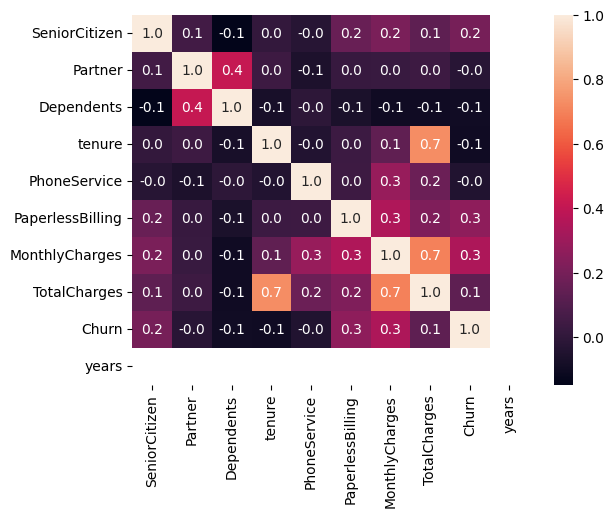

In [90]:
# To get more precisely the this insights, lets replot some charts, but just with churn values

dff_years = createYearColumn(dff)
dff_zero_years = dff_years[dff_years["tenure"] <= 3]
dff_zero_years

churn_heatmap_zero_years = churnHeatMap(dff_zero_years)

churn_percent_col_values_zero_years = churnPecentageColValues(
    dff_zero_years, min_churn_pct=65, chart=True
)
churn_percent_col_zero_years = churnPecentageCol(
    dff_zero_years, min_churn_pct=0, chart=True
)

# the que conclue that the main services was Fiber Otic, Multiples Lines, StreamTb aadn Streaming Check, and the user dosen't habe any supoport with Online Security, Technical Support or Online backup

___
 - ### Estatistcal Methods

We'll use estatistical methods to vertify this kind of association

In [91]:
# Lets use chi² to teste de idependecy of our columns
from scipy.stats import chi2_contingency

obj_columns = getColumnByTypes(dff,"objects")
obj_columns = obj_columns.drop("customerID")


# let's normalize chi² results with cramers
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))


def getColumnsAssociation(dataframe):
    related_columns = []
    for col in obj_columns:
        table = pd.crosstab(dataframe[col], dff["Churn"])
        p = cramers_v(table)
        p = round(p, 2)

        if p <= 0.1:
            related_columns.append(
                {"col_name": col, "p_value": p, "relevance": "Very Weak"}
            )
        elif p <= 0.3:
            related_columns.append({"col_name": col, "p_value": p, "relevance": "Weak"})
        elif p <= 0.5:
            related_columns.append(
                {"col_name": col, "p_value": p, "relevance": "Moderate"}
            )
        else:
            related_columns.append(
                {"col_name": col, "p_value": p, "relevance": "Strong"}
            )

    rdf = pd.DataFrame(related_columns).sort_values(by="p_value", ascending=False)
    return rdf

In [92]:
cols = churnPecentageCol(dff_zero_years, min_churn_pct=0, chart=False)
rdf = getColumnsAssociation(dff_zero_years)

merge_result = cols.merge(rdf, on="col_name").sort_values(by="p_value")
print(merge_result)

fig = go.Figure()
fig.add_trace(
    go.Bar(x=merge_result["col_name"], y=merge_result["Churn"], name="Churn Percentage")
)
fig.add_trace(
    go.Bar(x=merge_result["col_name"], y=merge_result["p_value"], name="Cramers V (Churn Association)")
)

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode="group", xaxis_tickangle=-45)
fig.show()

            col_name  Churn  p_value  relevance
9             gender   0.56     0.04  Very Weak
10     MultipleLines   0.62     0.16       Weak
0           Contract   0.23     0.20       Weak
6      PaymentMethod   0.53     0.27       Weak
5   DeviceProtection   0.53     0.33   Moderate
3       OnlineBackup   0.49     0.34   Moderate
7    StreamingMovies   0.54     0.34   Moderate
8        StreamingTV   0.54     0.34   Moderate
1     OnlineSecurity   0.46     0.36   Moderate
2        TechSupport   0.46     0.36   Moderate
4    InternetService   0.52     0.39   Moderate


### Insights:

 **1** - The most of churns happens until one year of contract and a good part until 6 months. The shorter the contract, the more churns. We can ser this clear on  ``[tenure]`` and ``[years]`` columns.

 **2** - We can conclude that the main services is Fiber Optic (that come from ``[InternetServices]``) and also the clients prefer choose MultiplesLines (telephone), Stream TV and Stream Movies services.

 **3** - We observe that the most of churns happens with Fiber Optic service and them dosent has suport: **No tech Suport**, **No OnlineSecurity**

 **4** - In this first look the columns ``[SeniorCitizen]``, ``[Partner]``, ``[Dependents]``, ``[tenure]``, ``[PhoneService]``,
       ``[PaperlessBilling]``, ``[MonthlyCharges]``, ``[TotalCharges]``probably dosen't have influence with churns.

### Concludes:
**Probably the clients that dosent had any support with the main service (fiber otic), are churn because technical problem issues.**

In [93]:
mycross = pd.crosstab([df["Churn"], df["Contract"]], df["InternetService"])
pivot = df.pivot_table(
    index="Churn", columns=["InternetService", "Contract"], aggfunc="size", fill_value=0
)
mycross
# pivot

InternetService       DSL  Fiber optic   No
Churn Contract                             
0     Month-to-month  829          966  425
      One year        517          435  355
      Two year        616          398  633
1     Month-to-month  394         1162   99
      One year         53          104    9
      Two year         12           31    5

___
### **Machine Larning Analysis**

In this topic lets predict the clients that was more chunt to have a churn

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [95]:
# Createing dummuies for de model

def getDummies(dataframe):
    if "customerID" in dataframe.columns:
        dataframe = dataframe.drop(columns="customerID")
    obj_columns = getColumnByTypes(dataframe,"objects").tolist()
    dummiedf = pd.get_dummies(dataframe, columns=obj_columns, drop_first=True)
    return dummiedf

# dfd = data frame dummies
dfd = dff
dfd = getDummies(dfd)


In [96]:
# Supondo que 'Churn' seja a variável alvo e esteja como 0/1
dfd["customerID"] = dff["customerID"].values  # Reanexando a coluna
X = dfd.drop(
    columns=["Churn", "customerID"]
)  # Garantindo que 'Churn' e 'customerID' não estejam em X

customer_ids = dfd["customerID"]
# random_num = random.randint(100)

y = dfd["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(
    max_iter=1000, class_weight="balanced"
)  # max_iter aumenta a chance de convergir


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)



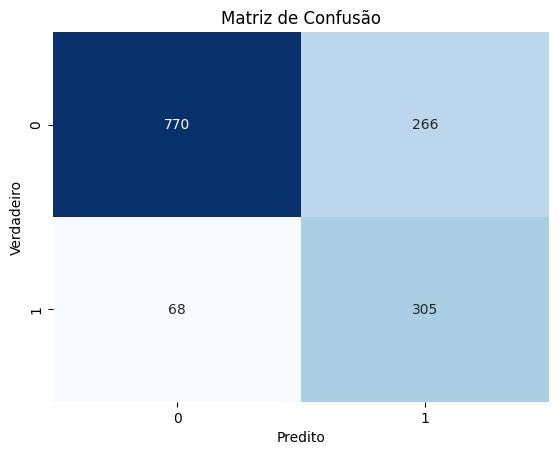

<Figure size 800x400 with 0 Axes>

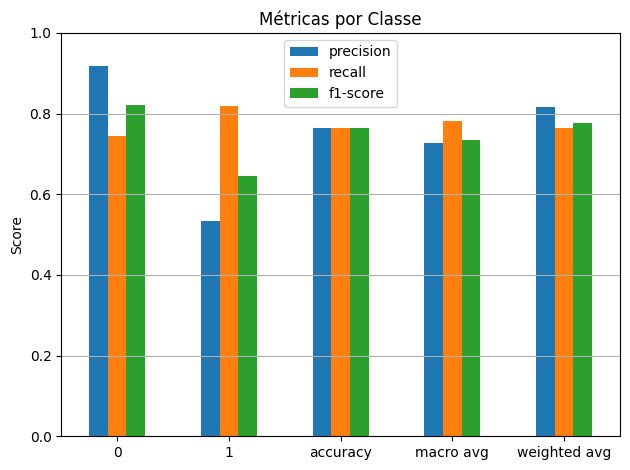

Acurácia: 0.763
[[770 266]
 [ 68 305]]
              precision    recall  f1-score      support
0              0.918854  0.743243  0.821772  1036.000000
1              0.534151  0.817694  0.646186   373.000000
accuracy       0.762952  0.762952  0.762952     0.762952
macro avg      0.726503  0.780469  0.733979  1409.000000
weighted avg   0.817013  0.762952  0.775290  1409.000000


In [97]:

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# ----------- 1. Plotar Matriz de Confusão -----------
# plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
# plt.show()

# ----------- 2. Plotar Métricas do classification_report -----------
# Remover "accuracy", "macro avg", "weighted avg" se quiser focar só nas classes
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Métricas por Classe')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

print(f"Acurácia: {accuracy:.3f}")
print(cm)
print(df_report)

### 📊 Métricas de Classificação - Explicação

770: churn=0 (cliente ficou) e o model previu churn=0 → acertou.

266: churn=0 (cliente ficou) e o model previu churn=1 → errou.

68: churn=1 (cliente saiu) e o model previu churn=0 → errou.

305: churn=1 (cliente saiu) e o model previu churn=1 → acertou.


| **Métrica**   | **O que mede**                                                       | **Quando é útil?**                                      |
|---------------|-----------------------------------------------------------------------|----------------------------------------------------------|
| **Accuracy**  | Percentual total de acertos                                           | Boa quando as classes estão **balanceadas**             |
| **Precision** | Percentual de acertos entre os que o model **disse que sairiam**    | Boa quando o custo de **falsos positivos** é alto       |
| **Recall**    | Percentual de acertos entre os que **realmente saíram**              | Boa quando o custo de **falsos negativos** é alto       |
| **F1-score**  | Média harmônica entre precision e recall                             | Boa em **problemas desbalanceados**                     |
| **Support**   | Quantidade de casos daquela classe no conjunto de teste              | **Contextualiza** as métricas acima                     |


- **model testing with one input** 

Now that we gotten the model, is the time the model in practical!

In [98]:

#creating da probability dataframe to testing
clients_current = dfd[dfd['Churn'] == 0].copy()
X_current = clients_current.drop(columns=['Churn', 'customerID'])
customer_ids_current = clients_current['customerID']
preds_current = model.predict(X_current)
probs_current = model.predict_proba(X_current)[:, 1]

df_churn_current = pd.DataFrame({
    'customerID': customer_ids_current,
    'churn_predicted': preds_current,
    'churn_probability': probs_current
})

# sorting values by churn
df_churn_current_sort = df_churn_current.sort_values(by='churn_probability', ascending=False)
df_churn_current_sort.head(5)

,customerID,churn_predicted,churn_probability
3159,5150-ITWWB,1,0.947600
3346,2545-EBUPK,1,0.938245
935,6630-UJZMY,1,0.927196
4618,6350-XFYGW,1,0.926689
5019,3320-VEOYC,1,0.925899


In [99]:
# get the most probably churn customer
first_customer = df_churn_current_sort.iloc[0]
first_customer_id = first_customer["customerID"]

def selectCustumerById(dataframe,id):
    return dataframe[dataframe["customerID"] == id]
        
select_custumer = selectCustumerById(dfd,first_customer_id)
select_custumer

X_test_input = select_custumer.drop(columns=['Churn','customerID'])
y_proba_input = model.predict_proba(X_test_input)
y_proba_custumer = round(first_customer["churn_probability"],5)
print(f"client {first_customer_id} Churn Probability:", round(y_proba_input[0][1], 5))

client 5150-ITWWB Churn Probability: 0.9476


In [100]:
# Fictional input data ( can edit this how you want to)
input_data = pd.DataFrame(
    {
        "customerID": ["5150-ITWWB"],
        "gender": ["Male"],
        "SeniorCitizen": [1],
        "Partner": [0],
        "Dependents": [0],
        "tenure": [3],
        "PhoneService": [1],
        "MultipleLines": ["No"],
        "InternetService": ["Fiber optic"],
        "OnlineSecurity": ["No"],
        "OnlineBackup": ["No"],
        "DeviceProtection": ["No"],
        "TechSupport": ["Yes"],
        "StreamingTV": ["No"],
        "StreamingMovies": ["Yes"],
        "Contract": ["Month-to-month"],
        "PaperlessBilling": [1],
        "PaymentMethod": ["Electronic check"],
        "MonthlyCharges": [94.85],
        "TotalCharges": [60],
        "Churn": "No",
        "years": [0],
    }
)

df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'years'],
      dtype='object')

In [101]:
import importlib
import utils.input_transformer

importlib.reload(utils.input_transformer)
from utils.input_transformer import stepEnconding
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

var_stepEnconding = stepEnconding(df,input_data)

y_proba_input = model.predict_proba(var_stepEnconding)
y_proba_input = round(y_proba_input[0][1], 5)

print(f"Fictional client churn probability:", y_proba_input)


Fictional client churn probability: 0.87704







- **Export the model to reusability in .pkl format** 

Export in .pkl to use in streamlit model

In [102]:
import pickle

with open("model_churn.pkl", "wb") as f:
    pickle.dump(model, f)

print("model saved with sucesss: model_churn.pkl")

model saved with sucesss: model_churn.pkl
